[View in Colaboratory](https://colab.research.google.com/github/sandroormeno/Tensorflow-basic-examples/blob/master/Perceptron_seg%C3%BAn_lopeLH.ipynb)

In [0]:
%matplotlib  inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [5]:
#cargando lo datos
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# one_hot = True hace que la salida de las etiquetas no sea un número
# sino un vector. x ejemplo para el 5 = [0,0,0,0,0,1,0,0,0,0] 

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


(-0.5, 27.5, 27.5, -0.5)

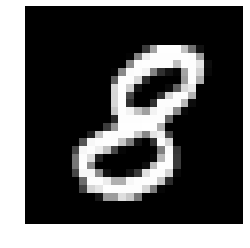

In [11]:
#para ver una imagen => mnist.train.images[5] (la imagen 5)
#la imagen es un vector de 784 datos de los pixeles
#para poder verlas hay que reordenarlas en 28 x 28 => reshape((28,28)
#para verlo en escla de grises => cmap="gray"
plt.imshow(mnist.train.images[5].reshape((28,28)), cmap="gray")
plt.axis('off')


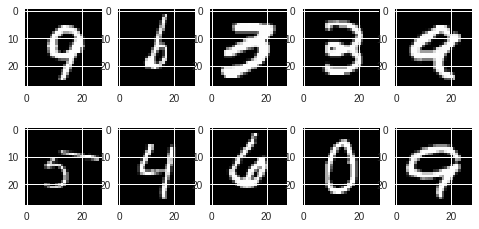

In [21]:
# otra forma de ver imágenes
import pylab as pylab
pylab.rcParams['figure.figsize'] = (8.0, 4.0)

f, axes = plt.subplots(2, 5)# plt.axis('off')

for i in range(10):
    axes.ravel()[i].imshow(mnist.train.images[randint(0,1000)].reshape((28,28)), cmap="gray")
   


![texto alternativo](https://raw.githubusercontent.com/sandroormeno/Tensorflow-basic-examples/master/Captura.JPG)

In [44]:
x = tf.placeholder(tf.float32,[None, 784])
#placeholder es un tipo de variable en tensor flow que no necesita ser entrenada
#datos de entrada de la red neuronal
#son las imágenes de 28 x 28 en una matriz de 784 datos (pixeles)
#None => es un número de filas (indefinida) para poner la cantidad que necesitemos 
#de esa manera nuestro sistema es más flexible
#float32 se usa para los números reales
y_ = tf.placeholder(tf.float32, [None, 10])
#la salida ideales de la red neuronal
# son 10 porque son diez posibles números 0 a 9
#para cada imegen su clasificación correcta
W = tf.Variable(tf.zeros([784, 10]))
#representa un Variable (de ceros) para la matriz de los Pesos sinápticos  
#784 columas para los datos de los pixeles 
# 10 filas para las categorias (0-9)
B = tf.Variable(tf.zeros([10]))
#representa la matriz (de ceros) de bias
y = tf.nn.tanh(tf.matmul(x, W) + B)
#la salida
# tanh => tangente hiperbólica
# multipocación de x por W , más B
# matmul es una funsión de TF para  multiplicación

#entrenar:

mse_loss = tf.reduce_mean(tf.square(y_-y))
#mean square error o error cuadrático medio
#un estimador mide el promedio de los errores al cuadrado
#los errores so iguales a las salidas ideales (y_) menos las salidas(y)
#square lo eleva al cuadrado, para que los valores siempre sean positivos
#reduce_mean hace el promedio
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(mse_loss)
# para entrenar lo ponemos en una variable
# e usados GradientDescent como optimizador
# el valor requerido es muy pequeño = 0,01
# y el valor que queremos minimizar (minimize) es "mse_loss"

#versiones anteriores

#inicializar las variables
init=tf.global_variables_initializer()
#creo una sesción 
sess = tf.Session()
# la sesción inicia las variables
sess.run(init)

#array que cuadan los valores que están aprendiendo
testPerformance = []
trainPerformance = []

# vamos hacer 150 repeticones de entrenamiento (epocas)
for i in range(150):
    #Stochastic gradient descent
    #vamos a elegir una muestra (1000) para nuestro entrenamiento
    #batch_xs y batch_ys son las variables de muestas
    #next_batch(1000) indica que en cada oteración tomará 1000 muestras
    #mnist tiene 60000 muestas de entrenamiento
    # 10000 muestras para test
    batch_xs, batch_ys = mnist.train.next_batch(1000)
    # una sesción de entrenamiento
    # que te pude la variable que contiene el entrenamiento = train_step
    # y luego un diccionario con los datos de entrenamiento y sus etiquetas
    # x:batch_xs, y_:batch_ys
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
    
    #le pongo los valores para:
    # testPerformance
    # trainPerformance
    trainPerformance.append(sess.run(mse_loss,feed_dict={x: batch_xs, y_: batch_ys}))
    testPerformance.append(sess.run(mse_loss,feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    if (i%10==0):
           print("Entrenando epoca :" + str(i))

# esto es para saber cuando termina
print ("Entrenamiento completo")

Entrenando epoca :0
Entrenando epoca :10
Entrenando epoca :20
Entrenando epoca :30
Entrenando epoca :40
Entrenando epoca :50
Entrenando epoca :60
Entrenando epoca :70
Entrenando epoca :80
Entrenando epoca :90
Entrenando epoca :100
Entrenando epoca :110
Entrenando epoca :120
Entrenando epoca :130
Entrenando epoca :140
Entrenamiento completo


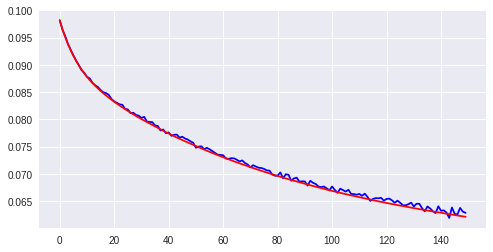

In [45]:
plt.plot(trainPerformance, "b")
plt.plot(testPerformance, "r")
plt.show()

[[-0.04356179 -0.02465912 -0.00423935  0.1035325   0.2074405   0.08722685
   0.00534271  0.16058692  0.1051773   0.15238014]]
La imagen es: 4


(-0.5, 27.5, 27.5, -0.5)

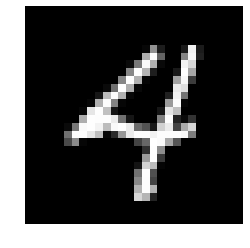

In [64]:
imagen = 6
prediccion = sess.run(y,feed_dict={x: mnist.test.images[imagen].reshape(1,784)})
print(prediccion)
print("La imagen es: {:}".format (np.argmax(prediccion)))
plt.imshow(mnist.train.images[imagen].reshape((28,28)), cmap="gray")
plt.axis('off')

In [57]:
prediccionTODO = sess.run(y,feed_dict={x: mnist.test.images, y_: mnist.test.labels})
errores = 0.

for i in range(prediccionTODO.shape[0]):
    if np.argmax(prediccionTODO[i]) != np.argmax(mnist.test.labels[i]):
       errores = errores+1
salida = errores/prediccionTODO.shape[0]*100        
print ("Errores de datos de prueba: {:<0.3} %".format(salida))
    

Errores de datos de prueba: 20.5 %
